In [1]:
from tessellation import Tessellation
from poi_data import RoadData, POIdata
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sylt = Tessellation('Sylt')

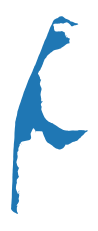

In [3]:
sylt_polygon = sylt.get_polygon()

sylt_polygon.plot().set_axis_off()

# Data Collection

In [4]:
POI_sylt = POIdata(sylt_polygon, ["amenity", "building"], 60, False).get_poi_data()
Road_sylt = RoadData(sylt_polygon).get_road_network()

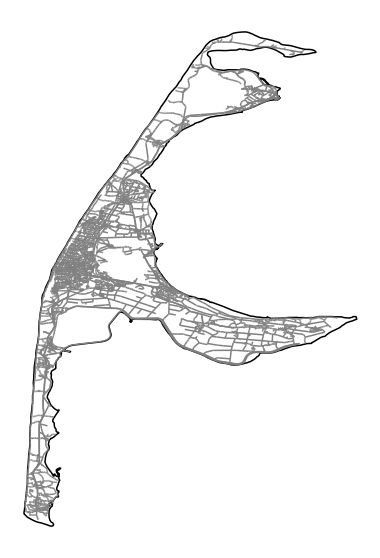

In [5]:
ax = sylt_polygon.boundary.plot(color='black', figsize=(8,10))
Road_sylt.plot(ax=ax, color='grey')
ax.set_axis_off()

# Squares and Hexagons

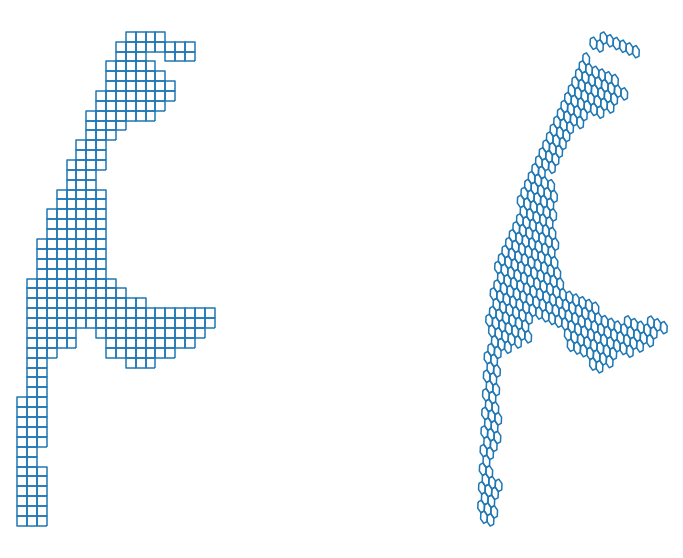

In [6]:
sylt_sq = sylt.squares(15)

sylt_hex = sylt.hexagons(8)

fig,axes = plt.subplots(1,2, figsize=(15,10))
sylt_sq.boundary.plot(ax=axes[0])
axes[0].set_axis_off()

sylt_hex.boundary.plot(ax=axes[1])
axes[1].set_axis_off()

# Adaptive Squares

In [7]:
sylt_asq = sylt.adaptive_squares(start_resolution=14, 
                                 poi_categories=["building"], 
                                 threshold=None, 
                                 timeout=60, 
                                 verbose=False)

<AxesSubplot:>

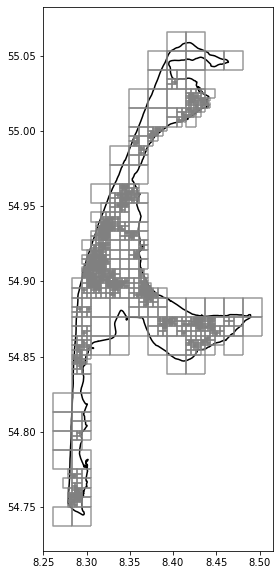

In [8]:
ax = sylt_polygon.boundary.plot(color='black', figsize=(8,10))
sylt_asq.boundary.plot(ax=ax, color="grey", alpha=0.8)

# Voronoi Polygons

In [9]:
sylt_kmeans = sylt.voronoi(cluster_algo="k-means",
                          poi_categories=["building"],
                          timeout=60,
                          n_polygons=len(sylt_sq),
                          verbose=False)

<AxesSubplot:>

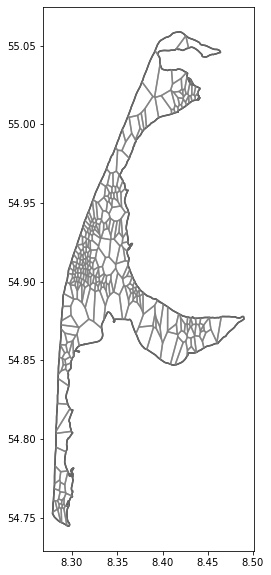

In [11]:
ax = sylt_polygon.boundary.plot(color='black', figsize=(8,10))
sylt_kmeans.boundary.plot(ax=ax, color="grey", alpha=0.8)

# city blocks

In [12]:
sylt_cb = sylt.city_blocks(number_of_LGUs=len(sylt_sq),
                          detail_deg=None,
                          split_roads=True,
                          verbose=False)

<AxesSubplot:>

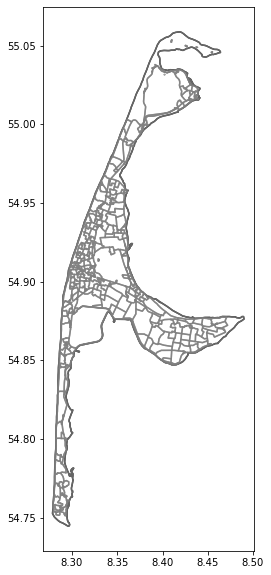

In [13]:
ax = sylt_polygon.boundary.plot(color='black', figsize=(8,10))
sylt_cb.boundary.plot(ax=ax, color="grey", alpha=0.8)

# American Island

In [15]:
key_west = Tessellation('Key West')

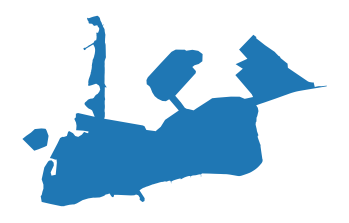

In [16]:
key_west_polygon = key_west.get_polygon()

key_west_polygon.plot().set_axis_off()

In [18]:
POI_kw = POIdata(key_west_polygon, ["amenity", "building"], 60, False).get_poi_data()
Road_kw = RoadData(key_west_polygon).get_road_network()

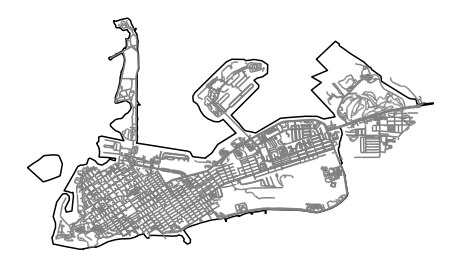

In [19]:
ax = key_west_polygon.boundary.plot(color='black', figsize=(8,10))
Road_kw.plot(ax=ax, color='grey')
ax.set_axis_off()

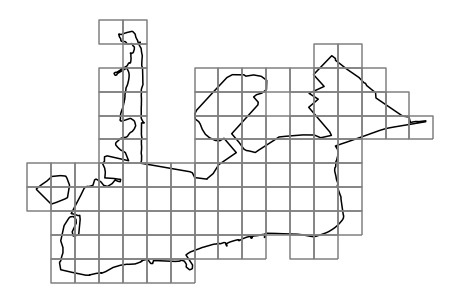

In [24]:
kw_sq = key_west.squares(16)

ax = key_west_polygon.boundary.plot(color='black', figsize=(8,10))
kw_sq.boundary.plot(ax=ax, color='grey')
ax.set_axis_off()

In [30]:
kw_asq = key_west.adaptive_squares(start_resolution=15, 
                                 poi_categories=["amenity"], 
                                 threshold=None, 
                                 timeout=60, 
                                 verbose=False)

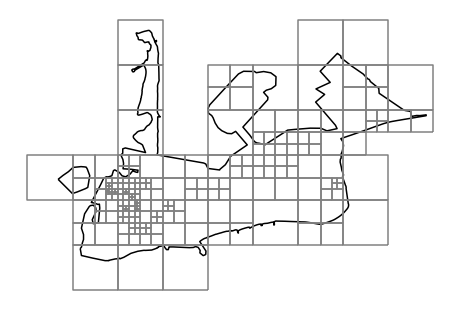

In [31]:
ax = key_west_polygon.boundary.plot(color='black', figsize=(8,10))
kw_asq.boundary.plot(ax=ax, color='grey')
ax.set_axis_off()

In [42]:
kw_kmeans = key_west.voronoi(cluster_algo="k-means",
                          poi_categories=["amenity"],
                          timeout=60,
                          n_polygons=len(kw_sq),
                          verbose=False)

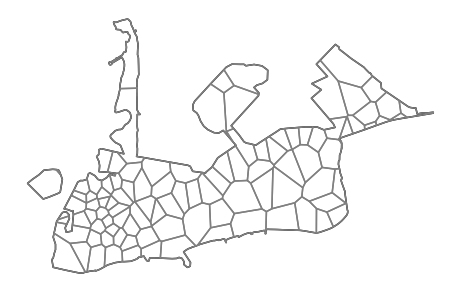

In [43]:
ax = key_west_polygon.boundary.plot(color='black', figsize=(8,10))
kw_kmeans.boundary.plot(ax=ax, color='grey')
ax.set_axis_off()

In [55]:
kw_hdbscan = key_west.voronoi(cluster_algo='hdbscan',
                            poi_categories=['amenity'],
                            timeout=30,
                            min_cluster_size=5,
                            verbose=True)

HDBSCAN Clustering... This can take a while...
Creating Voronoi polygons...


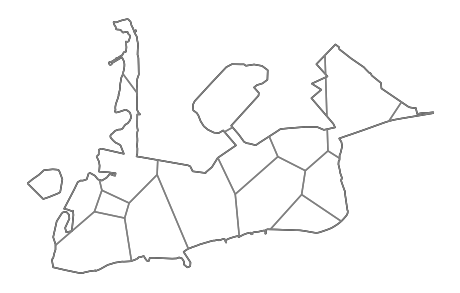

In [56]:
ax = key_west_polygon.boundary.plot(color='black', figsize=(8,10))
kw_hdbscan.boundary.plot(ax=ax, color='grey')
ax.set_axis_off()

In [61]:
kw_cb = key_west.city_blocks(number_of_LGUs=500,
                          detail_deg=None,
                          split_roads=True,
                          verbose=True)

Creating custom filter for all highway types
Created custom filter is ['highway'~'motorway|trunk|primary|secondary|tertiary|residential|unclassified|motorway_link|trunk_link|primary_link|secondary_link|living_street|pedestrian|track|bus_guideway|footway|path|service|cycleway']
Collection street network data
Splitting the linestring, such that each linestring has exactly 2 points.
Collected data has 19589 street segments
Road data is collected. Overall 19589 streets are included.
Creating initial city blocks using the road network data
Filtered out 149 polygons, that where not in the area.
Threshold for hierarchical clustering is computed.
Hierarchical Clustering in Progress.
Merging small city blocks...


<AxesSubplot:>

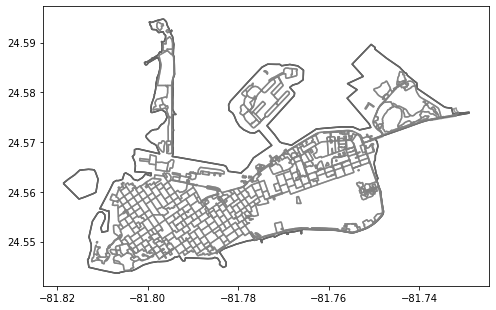

In [62]:
ax = key_west_polygon.boundary.plot(color='black', figsize=(8,10))
kw_cb.boundary.plot(ax=ax, color="grey", alpha=0.8)

In [63]:
type(len(kw_hex))

int